<h1>Projeto MLP: Classificação de sintomas de dor nas costas 🤕</h1> 

<p>Este projeto é parte da disciplina de Sistemas Inteligentes. Nele trabalharemos com a base de dados "Lower Back Pain Symptoms Dataset" com o objetivo de classificar os dados utilizando uma MLP.</p>

# Análise e tratamento de dados 🕵️

Nesta sessão iremos analisar nossa base de dados, buscando entender seus atributos, analisar possíveis anomalias e definir dados de treino, validação e teste.

Primeiramente vamos importar as bibliotecas necessárias sendo elas:
- Numpy: Operações matemáticas;
- Pandas: Manipulação de datasets;
- Sklearn: Modelos de machine learning.
- Seaborn/Matplotlib: Plotagem de gráficos

In [218]:
# importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Agora importamos a base de dados utilizando o pandas

In [219]:
# Importando dados e visualizando algumas instâncias
df = pd.read_csv('./Dataset_spine.csv')
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


Como a coluna 'Unnamed:13' os rotúlos do dataset que não são útes para a classificação, então podemos remove-lá.

Nesse momento também separamos os atributos utilizados no treino da classificação


In [220]:
df = df.drop(['Unnamed: 13'], axis=1)
y = df['Class_att']
X = df.drop(['Class_att'], axis=1)

Agora, verificamos se há dados faltantes em alguma das colunas

In [221]:
print(df.isnull().sum())

Col1         0
Col2         0
Col3         0
Col4         0
Col5         0
Col6         0
Col7         0
Col8         0
Col9         0
Col10        0
Col11        0
Col12        0
Class_att    0
dtype: int64


 Como não encontramos nenhum NaN, podemos assumir que não há dados faltando em nenhuma das colunas, portanto não será necessário realizar tratamento para esses casos.
 Em seguida, vamos visualizar os outliers.

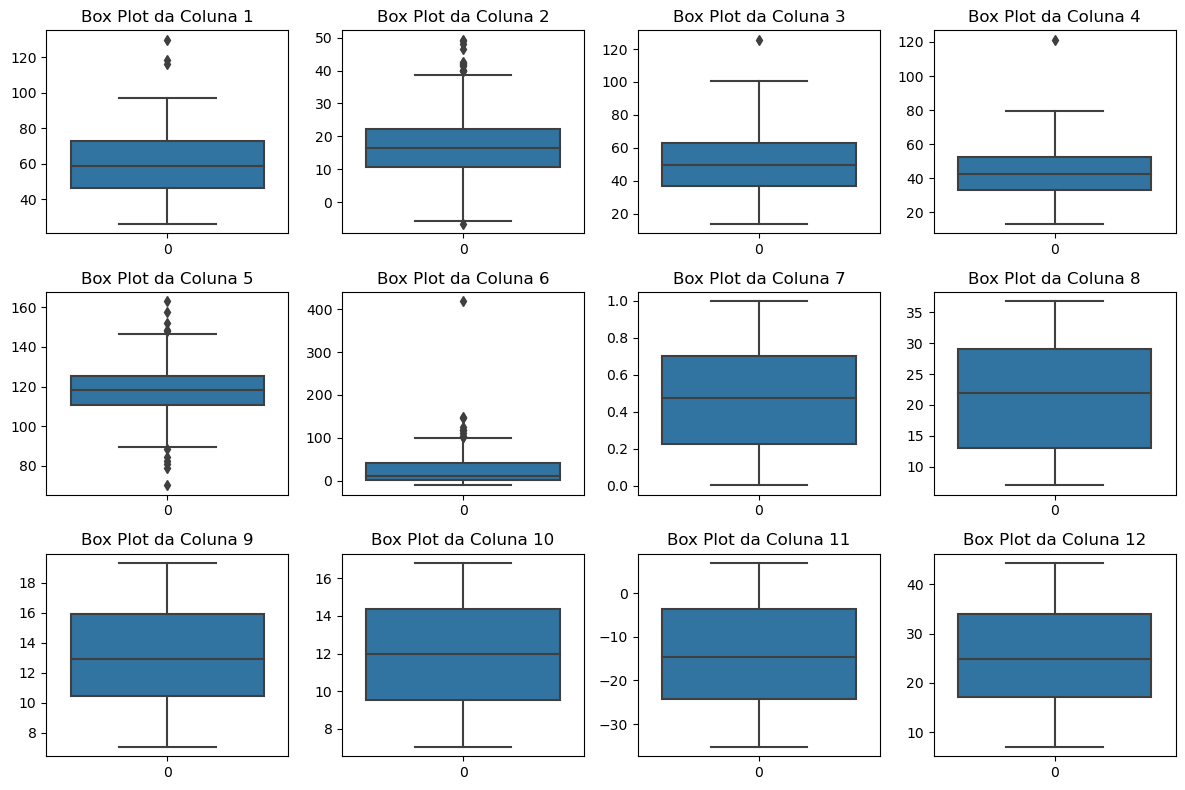

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crie uma grade de subplots 3x4 (3 linhas e 4 colunas)
fig, axes = plt.subplots(3, 4, figsize=(12, 8))

# Itere pelas colunas e adicione os boxplots aos subplots
for col in range(1, 13):
    row = (col - 1) // 4  # Calcule a linha atual
    col_idx = (col - 1) % 4  # Calcule a coluna atual
    ax = axes[row, col_idx]  # Obtenha o subplot atual

    sns.boxplot(df[f'Col{col}'], ax=ax)
    ax.set_title(f'Box Plot da Coluna {col}')

# Ajuste o layout
plt.tight_layout()

# Exiba o gráfico
plt.show()

posições do outlier (vamos usar?)

In [223]:
from scipy import stats
z = np.abs(stats.zscore(df['Col5']))
threshold = 3
# Position of the outlier
print(np.where(z > threshold))

(array([ 85, 167, 180]),)



# Primeiro Treino 💪

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

In [225]:
model = MLPClassifier(verbose=True, max_iter=200)
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

In [226]:
model.fit(X_train, y_train)

Iteration 1, loss = 1.91166489
Iteration 2, loss = 1.26469508
Iteration 3, loss = 1.47823380
Iteration 4, loss = 1.22159684
Iteration 5, loss = 0.89740632
Iteration 6, loss = 0.82750354
Iteration 7, loss = 0.82655075
Iteration 8, loss = 0.70372780
Iteration 9, loss = 0.61439480
Iteration 10, loss = 0.62335421
Iteration 11, loss = 0.60770848
Iteration 12, loss = 0.53938021
Iteration 13, loss = 0.49452325
Iteration 14, loss = 0.48414946
Iteration 15, loss = 0.45476954
Iteration 16, loss = 0.42466835
Iteration 17, loss = 0.44170719
Iteration 18, loss = 0.44027499
Iteration 19, loss = 0.39985694
Iteration 20, loss = 0.38553824
Iteration 21, loss = 0.38188021
Iteration 22, loss = 0.36989048
Iteration 23, loss = 0.36485139
Iteration 24, loss = 0.37178372
Iteration 25, loss = 0.36671719
Iteration 26, loss = 0.35450509
Iteration 27, loss = 0.34877407
Iteration 28, loss = 0.34746980
Iteration 29, loss = 0.34362909
Iteration 30, loss = 0.34059096
Iteration 31, loss = 0.33592246
Iteration 32, los

MLPClassifier(verbose=True)

In [227]:
y_pred = model.predict(X_test)

In [228]:
model.score(X_test, y_test)

0.8870967741935484

In [229]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.93      0.90      0.92        42
      Normal       0.81      0.85      0.83        20

    accuracy                           0.89        62
   macro avg       0.87      0.88      0.87        62
weighted avg       0.89      0.89      0.89        62



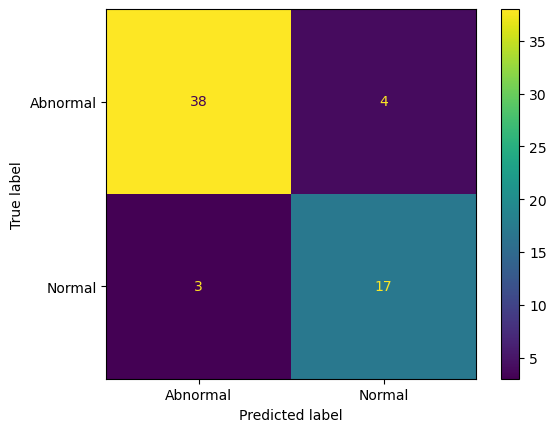

In [230]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [231]:
y_train.value_counts()

Abnormal    168
Normal       80
Name: Class_att, dtype: int64

In [232]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Pode ajustar a estratégia de amostragem conforme necessário
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [233]:
model = MLPClassifier(verbose=True, max_iter=200)
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

In [234]:
model.fit(X_train_resampled, y_train_resampled)

Iteration 1, loss = 3.25517348
Iteration 2, loss = 1.68906978
Iteration 3, loss = 1.97770103
Iteration 4, loss = 1.49262271
Iteration 5, loss = 0.93380552
Iteration 6, loss = 0.94434971
Iteration 7, loss = 1.01008713
Iteration 8, loss = 0.86778464
Iteration 9, loss = 0.70369544
Iteration 10, loss = 0.66835399
Iteration 11, loss = 0.69460647
Iteration 12, loss = 0.66103946
Iteration 13, loss = 0.56668838
Iteration 14, loss = 0.51490818
Iteration 15, loss = 0.52612837
Iteration 16, loss = 0.51567244
Iteration 17, loss = 0.47152103
Iteration 18, loss = 0.43538967
Iteration 19, loss = 0.44135662
Iteration 20, loss = 0.43482770
Iteration 21, loss = 0.41315606
Iteration 22, loss = 0.40886710
Iteration 23, loss = 0.40861482
Iteration 24, loss = 0.39564215
Iteration 25, loss = 0.38813496
Iteration 26, loss = 0.38638160
Iteration 27, loss = 0.38115681
Iteration 28, loss = 0.37344653
Iteration 29, loss = 0.36917532
Iteration 30, loss = 0.36717295
Iteration 31, loss = 0.36414390
Iteration 32, los

/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(verbose=True)

In [235]:
y_pred = model.predict(X_test)

In [236]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.93      0.88      0.90        42
      Normal       0.77      0.85      0.81        20

    accuracy                           0.87        62
   macro avg       0.85      0.87      0.86        62
weighted avg       0.88      0.87      0.87        62



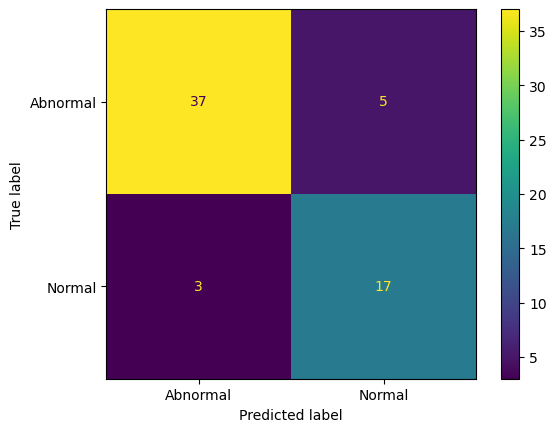

In [237]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

# using kfold
acho que nao funcionou mto bem

In [238]:
kf = KFold(n_splits=3, shuffle=False)

In [239]:
model = MLPClassifier(verbose=False)
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [240]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"iteration {i}:")
  X_train = X.iloc[train_index]
  y_train = y.iloc[train_index]
  X_test = X.iloc[test_index]
  y_test = y.iloc[test_index]

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(classification_report(y_test, y_pred))

iteration 0:
              precision    recall  f1-score   support

    Abnormal       1.00      0.42      0.59       104
      Normal       0.00      0.00      0.00         0

    accuracy                           0.42       104
   macro avg       0.50      0.21      0.30       104
weighted avg       1.00      0.42      0.59       104

iteration 1:
              precision    recall  f1-score   support

    Abnormal       1.00      0.95      0.98       103
      Normal       0.00      0.00      0.00         0

    accuracy                           0.95       103
   macro avg       0.50      0.48      0.49       103
weighted avg       1.00      0.95      0.98       103

iteration 2:
              precision    recall  f1-score   support

    Abnormal       0.03      1.00      0.06         3
      Normal       0.00      0.00      0.00       100

    accuracy                           0.03       103
   macro avg       0.01      0.50      0.03       103
weighted avg       0.00      0.03  

/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/

In [241]:
y_pred = model.predict(X_test)

In [242]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.03      1.00      0.06         3
      Normal       0.00      0.00      0.00       100

    accuracy                           0.03       103
   macro avg       0.01      0.50      0.03       103
weighted avg       0.00      0.03      0.00       103



/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [243]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [244]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred, y_test, pos_label=1)

/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:769: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_true = y_true == pos_label


TypeError: 'bool' object is not subscriptable